In [187]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')
pd.set_option("display.precision", 5)

In [188]:
# magic to reload modules automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
ff = pd.read_excel('data/5factors.xlsx')
rt = pd.read_excel('data/north.xlsx' , skiprows=3)
esg = pd.read_excel('data/north31.xlsx', skiprows=3)
print(rt.shape)
print(esg.shape)
print(ff.shape)

(2352, 124)
(12, 739)
(8261, 7)


In [190]:
pd.set_option('display.max_columns',735) # I want to see all the columns
pd.set_option('display.max_rows',735) 

In [191]:
ff.rename(columns = {'Unnamed: 0' : 'date'}, inplace=True)
ff['date'] = pd.to_datetime(ff['date'], format='%Y%m%d')
filt = (ff['date'] >= pd.to_datetime('2013-04-03')) & (ff['date'] <= pd.to_datetime('2022-02-28'))
ff = ff[filt]
ff.reset_index(inplace = True, drop = True)

In [192]:
rt.drop(index=[0,1,2], inplace=True)
rt.reset_index(inplace = True, drop = True) # Drop old index too

In [193]:
it = rt.copy()
it.to_excel('it.xlsx')

In [194]:
rt.rename(columns={'Unnamed: 0':'date'},inplace = True) 
xx = ['1COV GY Equity','DTG GY Equity','SINCH SS Equity',
                 'SHL GY Equity','NEL NO Equity','DHER GY Equity',
                 'HFG GY Equity','LIN GY Equity','NETS DC Equity',
                 'DAX Index','OMXS30B Index','OMXC25 Index','OMX Index']
drop_these = []
for i in xx:
    for j in range(1,6):
        drop_these.append(i + '.' + str(j))
drop_these = xx + drop_these
rt.drop(columns=xx, inplace = True)

In [195]:
rt.columns = rt.columns.str.replace(' GY', ' G')
rt.columns = rt.columns.str.replace(' SS', ' S')
rt.columns = rt.columns.str.replace(' NO', ' N')
rt.columns = rt.columns.str.replace(' DC', ' D')
rt.columns = rt.columns.str.replace(' Equity', '')
rt.columns = rt.columns.str.replace(' ', '_')

In [196]:
rt['date'] = pd.to_datetime(rt['date'])
#rt.set_index('date',inplace = True) 

In [197]:
esg.drop(columns=drop_these,inplace = True) 
esg.drop(index=[0,2], inplace=True)
esg.rename(columns={'Unnamed: 0':'Date'},inplace = True) 
esg.reset_index(inplace = True, drop = True) 

In [198]:
esg.replace({'ESG_DISCLOSURE_SCORE': 'ESG', 'ENVIRON_DISCLOSURE_SCORE': 'E',
             'SOCIAL_DISCLOSURE_SCORE': 'S','GOVNCE_DISCLOSURE_SCORE': 'G',
             'HISTORICAL_MARKET_CAP' : 'HMCAP', 'CUR_MKT_CAP': 'MCAP'}, inplace=True)

In [199]:
asg = esg.iloc[1] + ' ' + esg.iloc[0]
esg = esg.append(asg, ignore_index=True)
esg.loc[10,'Date'] = 'date'
nnn = esg.loc[10]
esg.rename(columns=nnn, inplace=True)
esg.drop(index=[0,1,10], inplace=True)
esg.reset_index(inplace = True, drop = True)

/var/folders/w7/73hr8f356051gkf_bz1wvzw00000gn/T/ipykernel_3524/1060375272.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esg = esg.append(asg, ignore_index=True)


In [200]:
esg.columns = esg.columns.str.replace(' GY', ' G')
esg.columns = esg.columns.str.replace(' SS', ' S')
esg.columns = esg.columns.str.replace(' NO', ' N')
esg.columns = esg.columns.str.replace(' DC', ' D')
esg.columns = esg.columns.str.replace(' Equity', '')
esg.columns = esg.columns.str.replace(' ', '_')
esg.set_index('date', inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [201]:
esg_esg = esg.loc[:,'ADS_G_ESG':'VWS_D_ESG']
esg_esg.columns = esg_esg.columns.str.replace('_ESG', '')

In [202]:
for i in rt.columns[1:]:
    rt.loc[:,i] = rt.loc[:,i].pct_change(1)*100
rt.drop(index=[0], inplace=True)

In [203]:
nyind = []
for i in esg_esg.index:
    nyind.append(str(i)+ '_esg')
esg_esg.index = nyind

In [204]:
rtt = pd.concat([rt, esg_esg])

In [205]:
#rtt.drop(columns='EVO_S', inplace=True)
#rt.drop(columns='EVO_S', inplace=True)
no_ger = rtt.columns[1:35].tolist()
rtt.drop(columns=no_ger, inplace=True)
rt.drop(columns=no_ger, inplace=True)
esg_esg.drop(columns=no_ger, inplace=True)

In [206]:
filt = (rtt['date'] >= pd.to_datetime('2013-01-01')) & (rtt['date'] <= pd.to_datetime('2013-12-31')) 
thirteen = rtt[filt]
thirteen = pd.concat([thirteen, esg_esg])
thirteen = thirteen.replace(0, np.nan)
thirteen.dropna(how='all', axis='columns', thresh=150, inplace=True)
thirteen = thirteen.replace(np.nan, 0)
print(thirteen.shape)

(203, 71)


In [207]:
#  2013
q_l = thirteen.loc[thirteen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.33)
q_h = thirteen.loc[thirteen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.67)
I = (thirteen.loc['2014_esg', 'ABB_S':'VWS_D'] <= q_l)
Ii = (thirteen.loc['2014_esg', 'ABB_S':'VWS_D'] > q_l) & (thirteen.loc['2014_esg', 'ABB_S':'VWS_D'] <= q_h)
Iii = (thirteen.loc['2014_esg', 'ABB_S':'VWS_D'] > q_h)

In [208]:
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum
thirteen.sort_values(by = '2014_esg', axis = 1, na_position ='first', inplace=True)

In [209]:
#2013
# low
thirteen = thirteen.iloc[:-8]
low_p=[]
for i in range(len(thirteen)):
     low_p.append(thirteen.iloc[i, 1:I_sum].mean())

# mid
mid_p=[]
for i in range(len(thirteen)):
     mid_p.append(thirteen.iloc[i, I_sum:Ii_sum].mean())

# high
high_p=[]
for i in range(len(thirteen)):
     high_p.append(thirteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [210]:
filt = (rtt['date'] >= pd.to_datetime('2014-01-01')) & (rtt['date'] <= pd.to_datetime('2014-12-31')) 
fourteen = rtt[filt]
fourteen = pd.concat([fourteen, esg_esg])
fourteen = fourteen.replace(0, np.nan)
fourteen.dropna(how='all', axis='columns', thresh=100, inplace=True)
fourteen = fourteen.replace(np.nan, 0)
fourteen.sort_values(by = '2014_esg', axis = 1, na_position ='first', inplace=True)

In [211]:
#2014
# low
fourteen = fourteen.iloc[:-8]
for i in range(len(fourteen)):
     low_p.append(fourteen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(fourteen)):
     mid_p.append(fourteen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(fourteen)):
     high_p.append(fourteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [212]:
#  2015
filt = (rtt['date'] >= pd.to_datetime('2015-01-01')) & (rtt['date'] <= pd.to_datetime('2015-12-31')) 
fifteen = rtt[filt]
fifteen = pd.concat([fifteen, esg_esg])
fifteen = fifteen.replace(0, np.nan)
fifteen.dropna(how='all', axis='columns', thresh=100, inplace=True)
fifteen = fifteen.replace(np.nan, 0)
nah = ['2014_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg','2021_esg']
fifteen.drop(index=nah, inplace=True)

q_l = fifteen.loc[fifteen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.33)
q_h = fifteen.loc[fifteen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.67)
I = (fifteen.loc['2015_esg', 'ABB_S':'VWS_D'] <= q_l)
Ii = (fifteen.loc['2015_esg', 'ABB_S':'VWS_D'] > q_l) & (fifteen.loc['2015_esg', 'ABB_S':'VWS_D'] <= q_h)
Iii = (fifteen.loc['2015_esg', 'ABB_S':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum

In [213]:
fifteen.sort_values(by = '2015_esg', axis = 1, na_position ='first', inplace=True)

In [214]:
#2015
# low
fifteen = fifteen.iloc[:-1]
for i in range(len(fifteen)):
     low_p.append(fifteen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(fifteen)):
     mid_p.append(fifteen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(fifteen)):
     high_p.append(fifteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [215]:
#  2016
filt = (rtt['date'] >= pd.to_datetime('2016-01-01')) & (rtt['date'] <= pd.to_datetime('2016-12-31')) 
sixteen = rtt[filt]
sixteen = pd.concat([sixteen, esg_esg])
sixteen = sixteen.replace(0, np.nan)
sixteen.dropna(how='all', axis='columns', thresh=120, inplace=True)
sixteen = sixteen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2017_esg','2018_esg','2019_esg','2020_esg','2021_esg']
sixteen.drop(index=nah, inplace=True)

q_l = sixteen.loc[sixteen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.33)
q_h = sixteen.loc[sixteen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.67)
I = (sixteen.loc['2016_esg', 'ABB_S':'VWS_D'] <= q_l)
Ii = (sixteen.loc['2016_esg', 'ABB_S':'VWS_D'] > q_l) & (sixteen.loc['2016_esg', 'ABB_S':'VWS_D'] <= q_h)
Iii = (sixteen.loc['2016_esg', 'ABB_S':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum

In [216]:
sixteen.sort_values(by = '2016_esg', axis = 1, na_position ='first', inplace=True)

In [217]:
#  2016
# low
sixteen = sixteen.iloc[:-1]
for i in range(len(sixteen)):
     low_p.append(sixteen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(sixteen)):
     mid_p.append(sixteen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(sixteen)):
     high_p.append(sixteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [218]:
#  2017
filt = (rtt['date'] >= pd.to_datetime('2017-01-01')) & (rtt['date'] <= pd.to_datetime('2017-12-31')) 
seventeen = rtt[filt]
seventeen = pd.concat([seventeen, esg_esg])
seventeen = seventeen.replace(0, np.nan)
seventeen.dropna(how='all', axis='columns', thresh=120, inplace=True)
seventeen = seventeen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2018_esg','2019_esg','2020_esg','2021_esg']
seventeen.drop(index=nah, inplace=True)

q_l = seventeen.loc[seventeen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.33)
q_h = seventeen.loc[seventeen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.67)
I = (seventeen.loc['2017_esg', 'ABB_S':'VWS_D'] <= q_l)
Ii = (seventeen.loc['2017_esg', 'ABB_S':'VWS_D'] > q_l) & (seventeen.loc['2017_esg', 'ABB_S':'VWS_D'] <= q_h)
Iii = (seventeen.loc['2017_esg', 'ABB_S':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum

In [219]:
seventeen.sort_values(by = '2017_esg', axis = 1, na_position ='first', inplace=True)

In [220]:
#  2017
# low
seventeen = seventeen.iloc[:-1]
for i in range(len(seventeen)):
     low_p.append(seventeen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(seventeen)):
     mid_p.append(seventeen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(seventeen)):
     high_p.append(seventeen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [221]:
#  2018
filt = (rtt['date'] >= pd.to_datetime('2018-01-01')) & (rtt['date'] <= pd.to_datetime('2018-12-31')) 
eighteen  = rtt[filt]
eighteen = pd.concat([eighteen, esg_esg])
eighteen = eighteen.replace(0, np.nan)
eighteen.dropna(how='all', axis='columns', thresh=120, inplace=True)
eighteen = eighteen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2019_esg','2020_esg','2021_esg']
eighteen.drop(index=nah, inplace=True)

q_l = eighteen.loc[eighteen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.33)
q_h = eighteen.loc[eighteen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.67)
I = (eighteen.loc['2018_esg', 'ABB_S':'VWS_D'] <= q_l)
Ii = (eighteen.loc['2018_esg', 'ABB_S':'VWS_D'] > q_l) & (eighteen.loc['2018_esg', 'ABB_S':'VWS_D'] <= q_h)
Iii = (eighteen.loc['2018_esg', 'ABB_S':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum

In [222]:
eighteen.sort_values(by = '2018_esg', axis = 1, na_position ='first', inplace=True)

In [223]:
#  2018
# low
eighteen = eighteen.iloc[:-1]
for i in range(len(eighteen)):
     low_p.append(eighteen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(eighteen)):
     mid_p.append(eighteen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(eighteen)):
     high_p.append(eighteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [224]:
#  2019
filt = (rtt['date'] >= pd.to_datetime('2019-01-01')) & (rtt['date'] <= pd.to_datetime('2019-12-31')) 
nineteen  = rtt[filt]
nineteen = pd.concat([nineteen, esg_esg])
nineteen = nineteen.replace(0, np.nan)
nineteen = nineteen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2020_esg','2021_esg']
nineteen.drop(index=nah, inplace=True)

q_l = nineteen.loc[nineteen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.33)
q_h = nineteen.loc[nineteen.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.67)
I = (nineteen.loc['2019_esg', 'ABB_S':'VWS_D'] <= q_l)
Ii = (nineteen.loc['2019_esg', 'ABB_S':'VWS_D'] > q_l) & (nineteen.loc['2019_esg', 'ABB_S':'VWS_D'] <= q_h)
Iii = (nineteen.loc['2019_esg', 'ABB_S':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum

In [225]:
nineteen.sort_values(by = '2019_esg', axis = 1, na_position ='first', inplace=True)

In [226]:
#  2019
# low
nineteen = nineteen.iloc[:-1]
for i in range(len(nineteen)):
     low_p.append(nineteen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(nineteen)):
     mid_p.append(nineteen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(nineteen)):
     high_p.append(nineteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [227]:
#  2020
filt = (rtt['date'] >= pd.to_datetime('2020-01-01')) & (rtt['date'] <= pd.to_datetime('2020-12-31')) 
twenty   = rtt[filt]
twenty = pd.concat([twenty, esg_esg])
twenty = twenty.replace(0, np.nan)
twenty = twenty.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2021_esg']
twenty.drop(index=nah, inplace=True)

q_l = twenty.loc[twenty.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.33)
q_h = twenty.loc[twenty.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.67)
I = (twenty.loc['2020_esg', 'ABB_S':'VWS_D'] <= q_l)
Ii = (twenty.loc['2020_esg', 'ABB_S':'VWS_D'] > q_l) & (twenty.loc['2020_esg', 'ABB_S':'VWS_D'] <= q_h)
Iii = (twenty.loc['2020_esg', 'ABB_S':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum

In [228]:
twenty.sort_values(by = '2020_esg', axis = 1, na_position ='first', inplace=True)

In [229]:
#  2020
# low
twenty = twenty.iloc[:-1]
for i in range(len(twenty)):
     low_p.append(twenty.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(twenty)):
     mid_p.append(twenty.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(twenty)):
     high_p.append(twenty.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [230]:
#  2021
filt = (rtt['date'] >= pd.to_datetime('2021-01-01')) & (rtt['date'] <= pd.to_datetime('2021-12-31')) 
twentyone = rtt[filt]
twentyone = pd.concat([twentyone, esg_esg])
twentyone = twentyone.replace(0, np.nan)
twentyone = twentyone.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg']
twentyone.drop(index=nah, inplace=True)

q_l = twentyone.loc[twentyone.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.33)
q_h = twentyone.loc[twentyone.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.67)
I = (twentyone.loc['2021_esg', 'ABB_S':'VWS_D'] <= q_l)
Ii = (twentyone.loc['2021_esg', 'ABB_S':'VWS_D'] > q_l) & (twentyone.loc['2021_esg', 'ABB_S':'VWS_D'] <= q_h)
Iii = (twentyone.loc['2021_esg', 'ABB_S':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum

In [231]:
twentyone.sort_values(by = '2021_esg', axis = 1, na_position ='first', inplace=True)

In [232]:
twentyone.tail(3)

,date,AKER_N,FRO_N,DNO_N,KINVB_S,INVEB_S,EVO_S,GMAB_D,STB_N,HEXAB_S,GJF_N,BWLPG_N,SIM_D,SWMA_S,TOM_N,NDA_S,DEMANT_D,SCHA_N,SALM_N,HMB_S,LSG_N,GN_D,TRYG_D,SKAB_S,BWO_N,DSV_D,DNB_N,TEL2B_S,ROCKB_D,MOWI_N,TELIA_S,SHBA_S,BAVA_D,TGS_N,COLOB_D,LUN_D,DANSKE_D,GETIB_S,SWEDA_S,ALFA_S,ATCOB_S,ATCOA_S,FLS_D,RBREW_D,CHR_D,AMBUB_D,TEL_N,SEBA_S,ASSAB_S,BAKKA_N,ISS_D,NOVOB_D,VOLVB_S,ALIV_S,SKFB_S,MAERSKB_D,MAERSKA_D,SUBC_N,ENTRA_N,ELUXB_S,PNDORA_D,ORK_N,NZYMB_D,VWS_D,ERICB_S,EQNR_N,SCAB_S,SAND_S,ORSTED_D,CARLB_D,AZN_S,AKRBP_N,BOL_S,ABB_S,ESSITYB_S,YAR_N,NHY_N
2282,2021-12-30 00:00:00,0.36496,0.99711,1.01449,0.96981,0.17594,4.09518,1.23172,1.02716,-0.7942,0.18727,-0.39801,-0.99723,0.1669,0.12694,-0.34271,-0.62278,0.35409,0.0000,0.12369,0.64215,-0.26673,0.4041,0.51502,0.60514,-0.06542,0.04953,0.34979,0.56259,0.04794,0.05652,0.14327,1.05263,0.52294,-1.58187,0.3268,0.0000,0.0000,-0.24104,-0.38272,-0.26237,-0.57197,0.04095,0.32662,-0.03879,0.84523,-0.25189,-0.03971,-0.79023,0.03428,1.37875,1.57546,-0.04768,0.88002,0.18683,-0.84567,-0.90992,0.95877,0.6599,0.22831,-0.80292,0.09062,0.22388,2.30179,0.31162,-1.23508,0.15576,-0.78555,0.28818,0.26631,0.35883,-0.91208,-1.10201,-0.88953,0.03386,-1.02313,0.89985
2283,2021-12-31 00:00:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2021_esg,0,25.75190,30.63070,34.44320,34.56390,34.67460,35.02670,37.30010,38.65810,38.7285,38.74860,40.13680,41.85700,42.4102,43.59720,43.76820,43.97950,44.26110,44.2813,44.55290,44.64340,45.12620,45.6795,46.61500,46.82630,46.89670,47.17840,47.53040,47.64110,47.80200,48.33520,48.34520,48.60680,48.82810,49.08960,49.2305,49.7234,50.4577,50.46780,50.62870,51.29260,51.29260,51.30270,51.32280,51.74530,52.05710,52.08730,52.30860,52.50980,52.72110,52.86190,53.04300,54.06900,54.27020,54.37080,54.45130,54.45130,54.92410,55.1957,55.42700,56.25190,56.78500,57.75070,57.79100,58.40460,58.50520,58.80700,60.16500,61.92540,62.23720,62.59930,63.85680,65.17450,65.72780,65.75800,68.09170,72.98060


In [233]:
#  2021
# low
twentyone = twentyone.iloc[:-1]
for i in range(len(twentyone)):
     low_p.append(twentyone.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(twentyone)):
     mid_p.append(twentyone.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(twentyone)):
     high_p.append(twentyone.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [234]:
#  2022
filt = (rtt['date'] >= pd.to_datetime('2022-01-01')) & (rtt['date'] <= pd.to_datetime('2022-04-02')) 
twentytwo = rtt[filt]
twentytwo = pd.concat([twentytwo, esg_esg])
twentytwo = twentytwo.replace(0, np.nan)
twentytwo = twentytwo.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg']
twentytwo.drop(index=nah, inplace=True)

q_l = twentytwo.loc[twentytwo.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.33)
q_h = twentytwo.loc[twentytwo.index[-1], 'ABB_S' : 'VWS_D'].quantile(q=0.67)
I = (twentytwo.loc['2021_esg', 'ABB_S':'VWS_D'] <= q_l)
Ii = (twentytwo.loc['2021_esg', 'ABB_S':'VWS_D'] > q_l) & (twentytwo.loc['2021_esg', 'ABB_S':'VWS_D'] <= q_h)
Iii = (twentytwo.loc['2021_esg', 'ABB_S':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum

In [235]:
twentytwo.sort_values(by = '2021_esg', axis = 1, na_position ='first', inplace=True)

In [236]:
#  2022
# low
twentytwo = twentytwo.iloc[:-1]
for i in range(len(twentytwo)):
     low_p.append(twentytwo.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(twentytwo)):
     mid_p.append(twentytwo.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(twentytwo)):
     high_p.append(twentytwo.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [240]:
twentytwo

,date,AKER_N,FRO_N,DNO_N,KINVB_S,INVEB_S,EVO_S,GMAB_D,STB_N,HEXAB_S,GJF_N,BWLPG_N,SIM_D,SWMA_S,TOM_N,NDA_S,DEMANT_D,SCHA_N,SALM_N,HMB_S,LSG_N,GN_D,TRYG_D,SKAB_S,BWO_N,DSV_D,DNB_N,TEL2B_S,ROCKB_D,MOWI_N,TELIA_S,SHBA_S,BAVA_D,TGS_N,COLOB_D,LUN_D,DANSKE_D,GETIB_S,SWEDA_S,ALFA_S,ATCOB_S,ATCOA_S,FLS_D,RBREW_D,CHR_D,AMBUB_D,TEL_N,SEBA_S,ASSAB_S,BAKKA_N,ISS_D,NOVOB_D,VOLVB_S,ALIV_S,SKFB_S,MAERSKB_D,MAERSKA_D,SUBC_N,ENTRA_N,ELUXB_S,PNDORA_D,ORK_N,NZYMB_D,VWS_D,ERICB_S,EQNR_N,SCAB_S,SAND_S,ORSTED_D,CARLB_D,AZN_S,AKRBP_N,BOL_S,ABB_S,ESSITYB_S,YAR_N,NHY_N
2284,2022-01-03 00:00:00,1.69697,7.35669,2.24773,-0.46476,1.27333,-0.26434,-1.14068,-0.58744,1.67073,-1.35514,0.89910,2.32233,0.88864,-0.15848,1.50226,1.25336,2.14643,0.55921,0.69632,1.74014,1.09409,0.18576,-0.34159,3.75940,0.45827,0.89109,0.15492,1.67832,0.95831,0.69199,1.55324,-0.03720,2.08087,-0.82537,0.62185,1.54936,-0.78461,1.58155,0.76839,1.20256,1.43816,3.64306,2.41454,0.50446,3.35260,0.75758,1.62892,1.33961,0.23989,2.32000,-3.06122,1.76485,1.23404,1.63170,2.77186,2.75482,3.95695,1.05900,1.09339,-0.51508,-1.65233,-0.07446,-0.85000,0.69145,-0.16956,-1.39969,1.86065,2.46648,2.25764,-0.22582,3.53461,1.14286,1.38969,-0.16926,5.16854,-0.31646
2285,2022-01-04 00:00:00,-0.17878,-0.68229,1.35641,-1.63424,0.93215,-0.06236,-1.80769,2.13636,-2.97843,0.09474,-0.99010,-3.14465,0.33031,-1.49206,1.44437,-0.23578,-1.92861,-0.81780,-0.98149,-0.05701,-1.20250,0.55624,1.97087,3.26087,-0.29326,0.29441,1.23743,-4.05777,-0.56953,-0.14025,-0.04025,-5.17306,1.87630,-1.75208,-1.64803,3.05144,-2.83163,-0.03244,4.22113,1.18827,1.54379,1.46130,1.13907,1.35135,-8.89262,0.68027,0.07819,0.67881,-0.92308,1.48554,-2.96140,3.11694,1.15595,2.75229,0.74689,1.42985,2.00974,-1.94611,-0.49572,4.06805,1.38090,-0.22355,0.27736,0.09952,2.18684,1.64038,1.59347,-4.44029,-0.25974,-1.67861,-0.39118,3.64407,0.97087,-0.23737,-1.06838,2.33766
2286,2022-01-05 00:00:00,1.37313,-1.07527,4.01477,-2.45253,-2.06186,0.21841,-1.21426,2.20294,-0.59986,0.94652,-2.40000,-0.25409,0.19204,-1.70802,-0.72069,-1.62482,-0.76313,0.92348,0.25907,0.14261,0.94937,0.82975,-0.16807,-3.50877,0.16340,0.04892,-0.26738,-0.71685,0.95465,-0.74438,0.12080,-0.70644,1.18236,-0.40125,-0.68821,2.58037,-1.47020,0.02163,-1.51555,-0.84404,-0.93081,1.47917,-0.36668,1.10476,2.91590,0.21337,-0.58594,-0.85167,-0.06901,-0.46225,-0.80995,-0.68182,0.62331,0.00000,0.86491,0.44053,0.41791,1.73028,-1.13225,-0.49751,-0.68104,-1.38163,-1.00578,-0.41758,2.18159,1.11732,-0.53558,-1.66300,-0.04340,-0.24938,3.46305,0.29981,-0.76357,-0.37390,2.93737,-0.22561
2287,2022-01-06 00:00:00,-1.35453,0.15097,0.53239,0.00000,0.00000,0.00000,-3.84615,0.60962,0.00000,-0.60947,-0.53279,-1.64166,0.00000,-3.93443,0.00000,-0.30030,-3.57882,-0.84967,0.00000,-1.36713,-4.55751,0.42670,0.00000,0.58182,-4.01305,0.09780,0.00000,-1.87726,-0.70922,0.00000,0.00000,-2.52964,2.08989,-3.26768,-1.44622,-1.48454,0.00000,0.00000,0.00000,0.00000,0.00000,-4.52628,-0.55205,-1.80859,-5.45780,-0.49681,0.00000,0.00000,-4.21271,-1.35449,-2.71216,0.00000,0.00000,0.00000,-3.14414,-2.89474,-1.21879,-0.95048,0.00000,-1.71429,-0.32000,-2.65051,-4.64821,0.00000,0.32534,0.00000,0.00000,-5.12310,-1.04212,0.00000,-1.89786,0.00000,0.00000,0.00000,-5.24549,-2.23290
2288,2022-01-07 00:00:00,0.17910,0.00000,-1.80936,-2.59530,-1.11842,-7.78331,-2.18557,1.23350,-3.01739,0.75472,1.97775,0.51799,1.83461,1.53584,0.21246,-0.72289,-0.06135,-1.02175,-1.26952,0.14438,-1.21273,0.00000,-1.85185,0.86768,-0.16995,2.19834,-2.02987,-1.47167,-0.85714,-0.49526,1.39755,-1.29765,-0.88048,-1.57335,-1.00887,-0.96275,-3.91687,-0.24870,-4.43088,-3.03479,-3.94613,-5.26316,1.13666,-0.26861,0.31546,-0.99857,0.43222,-2.79170,2.41528,-1.37309,-0.49460,-0.16018,-1.11501,3.03571,1.26476,1.35501,2.25700,-0.50505,-0.41228,-2.13178,-0.87136,0.73901,-2.90357,0.09984,-1.09445,1.25844,-2.15385,-4.37746,-1.88679,-0.48077,-0.24622,0.19022,-1.70989,0.06824,0.88574,2.48627
2289,2022-01-10 00:00:00,-1.13230,-2.41182,-0.94382,-4.84596,-2.94966,-2.49831,-0.42159,1.45361,-4

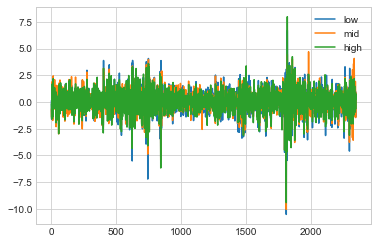

In [237]:
plt.plot(low_p, label = 'low')
plt.plot(mid_p, label = 'mid')
plt.plot(high_p, label = 'high')
plt.legend();

In [238]:
rt['port_low'] = low_p
rt['port_mid'] = mid_p
rt['port_high'] = high_p

In [239]:
rt.to_excel('rt.xlsx')
ff.to_excel('ff.xlsx')
esg_esg.to_excel('esg_esg.xlsx')